# Lab 1: Implementing a Linear Regression Model
For this lab, we'll implement a linear regression model using sklearn's [diabetes dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html). 

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from sklearn import datasets, linear_model
import pandas as pd

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

In [25]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

## Step 1: Create your datasets
Create one dataframe to hold the features, and one dataframe to hold the targets: 

In [26]:
df_x = pd.DataFrame(diabetes.data,
                 columns=diabetes.feature_names)

In [27]:
df_x.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


We can see that we have all continuous variables, so each feature can be examined for a relationship with progression of diabetes.

In [28]:
df_y = pd.DataFrame(diabetes.target,
                 columns=["progression"])

In [29]:
df_y.head()

,progression
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


## Step 2: Check for linear relationships
Check for potential linear relationships between each feature and disease progression to see if any features should be eliminated. 

In the cell below, I've plotted the relationship between age and disease progression. Repeat the same plot for each columnn in your dataset. 

Text(0.5, 1.0, 'Age and Disease Progression')

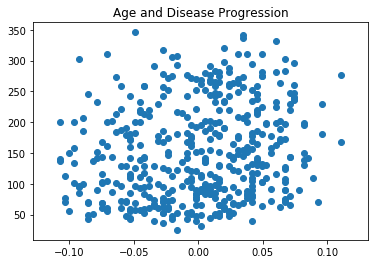

In [30]:
plt.scatter(df_x.age, df_y.progression)
plt.title("Age and Disease Progression")

In [ ]:
# plot each column vs target 

Based on the scatterplots, subset your dataframe for only the columsn that shows some correlation with your target. 

In [48]:
df_x = df_x[[# your columns here]]

## Step 3: Check for Multicolinearity
We need to check the remaining variables to make sure they are independent of each. This means that none of the other features are highly correlated with each other. 

Create a correlation matrix of your subset dataframe below and plot. Pay attention to the new arguments for the heatmap 

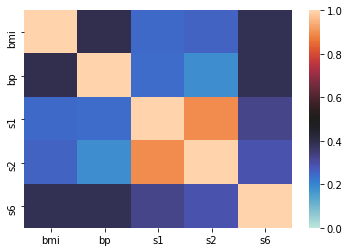

In [49]:
import seaborn as sns
corr = # calc correlation on your subset
sns.heatmap(corr, 
            vmin=0, vmax=1, # setting min and max probability
            center=0.5, # changing to peach for high correlation, blue for low
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Our heatmpap legend shows that highly correlated variables are in peach shades, and lowly correlated in blue. Pull out any columns that appear highly correlated with each other and take a better look. 

In [50]:
df_x[[# examine correlated features ]].corr()

,s1,s2
s1,1.000000,0.896663
s2,0.896663,1.000000


It would be impossible to distinguish if the correlated columns, or some combination of them, is what would have an affect on disease progression, so we need to remove these features from our regression model. 

In [51]:
df_x = df_x.drop([# drop columns]], axis=1)

In [52]:
df_x.head()

,bmi,bp,s6
0,0.061696,0.021872,-0.017646
1,-0.051474,-0.026328,-0.092204
2,0.044451,-0.005671,-0.025930
3,-0.011595,-0.036656,-0.009362
4,-0.036385,0.021872,-0.046641


Since BMI showed a stronger linear relationship with the target in the scatterplots, we'll choose that feature for linear regression. 

In [60]:
df_x = df_x[["bmi"]]

## Step 4: Create training and testing datasets
Pull out 20% of your data for testing. 

In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(# dataframes here,  
                                                   test_size=# pull out 20% here, 
                                                   random_state=42)

## Step 5: Instantiate the Model Object
Create the sklearn linear regression object that allows us to use linear regression methods and access attributes: 

In [62]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True,
                        n_jobs=6)

## Step 6: Train your model
Now we'll train (fit) the model to our training set: 

In [63]:
fit = model.fit(# insert training data)

The code below prints out the coefficients for each column: 

In [81]:
coef_df = pd.DataFrame([df_x.columns[0], int(fit.coef_)]).T
coef_df.columns = ["feature", "coeff"]
coef_df

,feature,coeff
0,bmi,998


## Step 7: Make Predictions
We've trained our model on our training set, now we use it to make predictions with our test set: 

In [83]:
preds = model.predict(# make predictions on test data)

In [ ]:
# plot your predictions against your actual values
plt.scatter(#plot test ground truth vs predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

## Step 8: Plot Residuals
Before we evaluate the model results, we need to make sure that the residuals do not show any patterns.  

In [ ]:
residuals = # calculate residuals
plt.scatter(model.predict(x_test), residuals,
            c='b', s=40, alpha=0.5) # plot x_test vs residuals
plt.title("Residuals Plot")
plt.xlabel("Testing Data")
plt.ylabel("Residuals")

Now that we're sure our model is solid, we can move on to learning how to evaluate the results. 